In [3]:
import numpy as pyplot
import pandas as pd
import numpy as np

In [4]:
raw_data=pd.read_csv('train_V2.csv')

瀏覽資料

In [5]:
raw_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


去除缺值

In [6]:
raw_data=raw_data.dropna(subset=['winPlacePerc'])

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints        

將以下六個feature拔掉


In [8]:
raw_data=raw_data.drop(['Id', 'groupId', 'matchId', 'rankPoints', 'winPoints', 'killPoints'] , axis=1)

In [9]:
des=raw_data.describe()
des.to_csv('raw_data_describe.csv')

In [10]:
raw_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,...,26,0,0.0000,0,0.00,0,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,57,0,0,0.00,...,25,0,0.0045,0,11.04,0,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,47,0,0,0.00,...,47,0,0.0000,0,0.00,0,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,75,0,0,0.00,...,30,0,0.0000,0,0.00,0,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,45,1,1,58.53,...,95,0,0.0000,0,0.00,0,0,49.75,2,0.1875


印出統計圖表

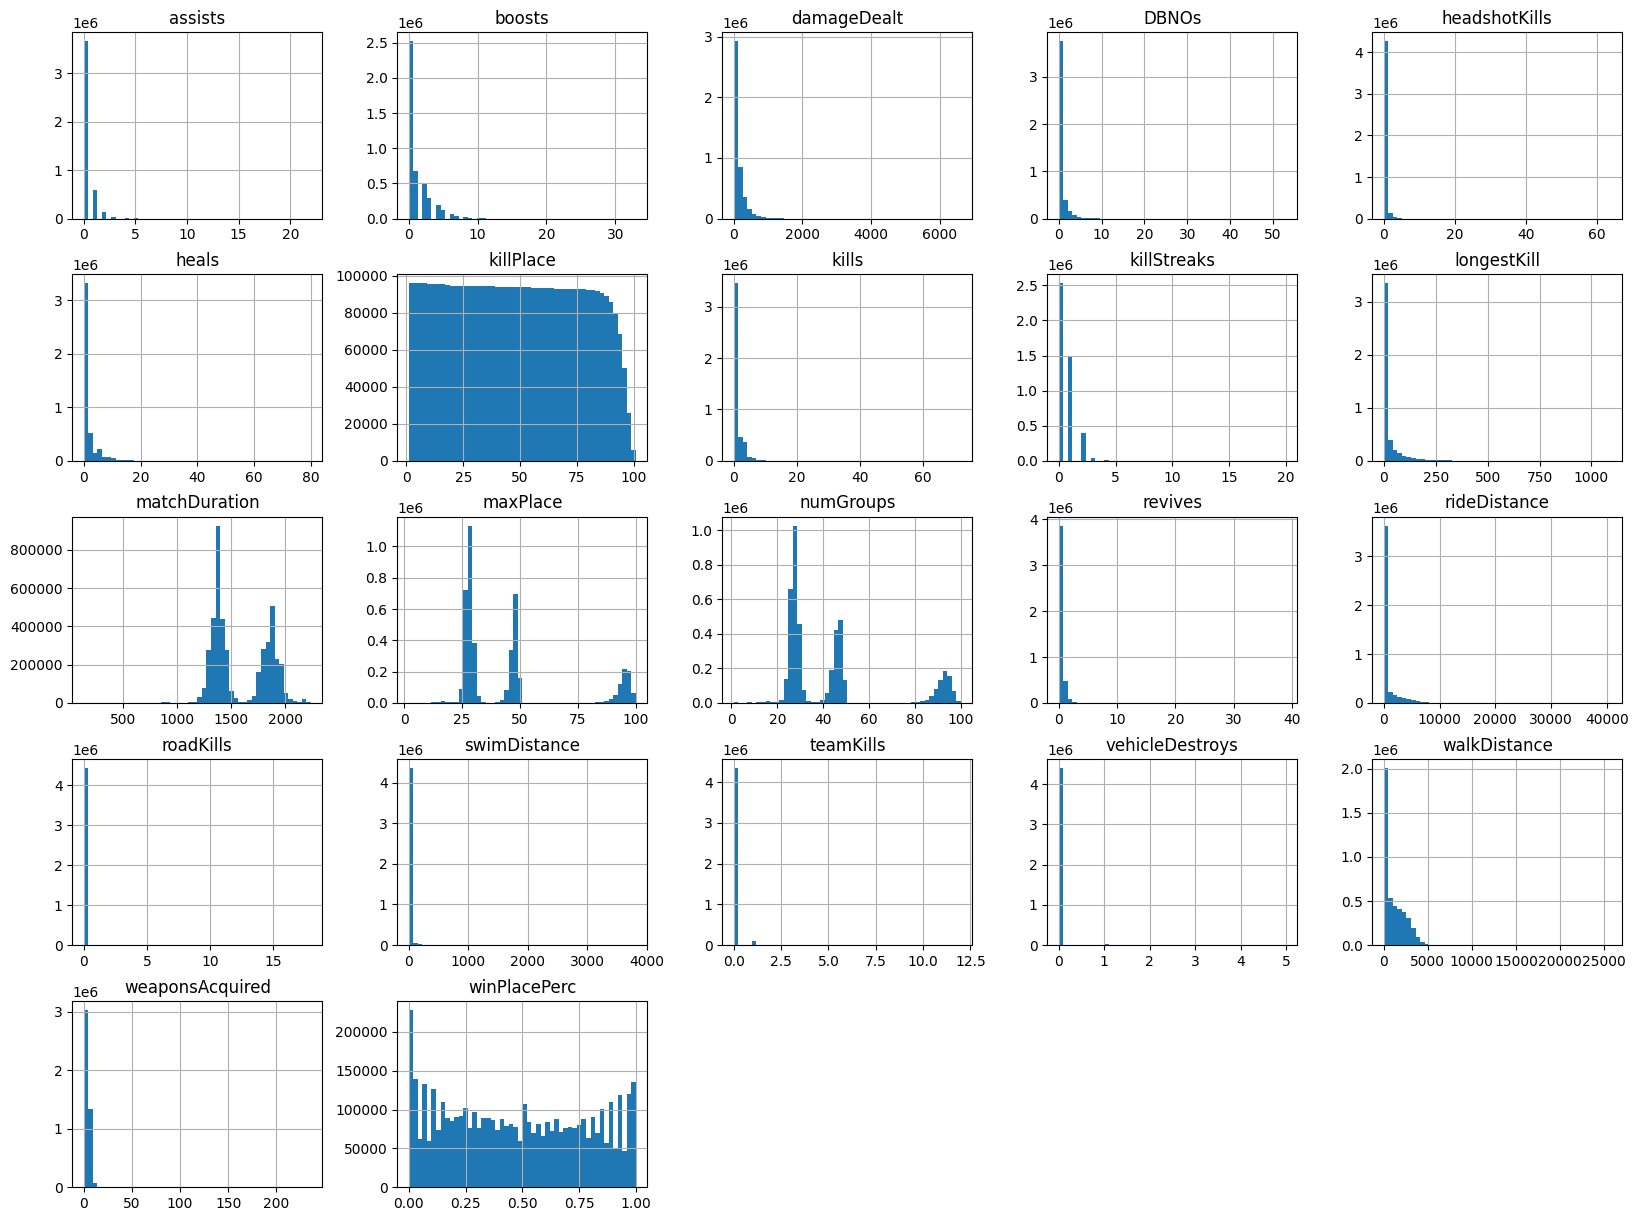

In [11]:
import matplotlib.pyplot as plt
raw_data.hist(bins=50, figsize=(20, 15))
plt.show()

找出相關程度過高的feature並拔除

In [12]:
corr=raw_data.select_dtypes(include=[float, int]).corr()
for feature in raw_data.columns:
     if feature!="matchType":
          out=corr[feature].sort_values(ascending=False)
          for i in out:
               if i>=0.9 and i!=1:
                    print(feature)
                    print(i)

maxPlace
0.9978997329925091
numGroups
0.9978997329925091


In [13]:
raw_data=raw_data.drop(['maxPlace'] , axis=1)

計算百分位

In [14]:
for feature in raw_data.columns:
    if feature!="matchType":
        print(feature+":", end="")
        print(raw_data[feature].quantile(0.9999))

assists:7.0
boosts:13.0
damageDealt:2168.3035999992862
DBNOs:15.0
headshotKills:9.0
heals:33.0
killPlace:100.0
kills:21.0
killStreaks:5.0
longestKill:693.1
matchDuration:2214.0
numGroups:100.0
revives:5.0
rideDistance:15420.0
roadKills:3.0
swimDistance:778.2303599999286
teamKills:3.0
vehicleDestroys:2.0
walkDistance:9124.303599999286
weaponsAcquired:39.0
winPlacePerc:1.0


遊戲模式

In [15]:
raw_data.matchType.value_counts()

matchType
squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: count, dtype: int64

分成squad-fpp, duo-fpp, solo-fpp, squad, duo, solo, remain 

In [16]:
squadf_data=raw_data[(raw_data['matchType']=="squad-fpp") | (raw_data['matchType']=="normal-squad-fpp")]
duof_data=raw_data[(raw_data['matchType']=="duo-fpp") | (raw_data['matchType']=="normal-duo-fpp")]
solof_data=raw_data[(raw_data['matchType']=="solo-fpp") | (raw_data['matchType']=="normal-solo-fpp")]
squad_data=raw_data[(raw_data['matchType']=="squad") | (raw_data['matchType']=="normal-squad")]
duo_data=raw_data[(raw_data['matchType']=="duo") | (raw_data['matchType']=="normal-duo")]
solo_data=raw_data[(raw_data['matchType']=="solo") | (raw_data['matchType']=="normal-solo")]
other_data=raw_data[(raw_data['matchType']=="crashfpp") | (raw_data['matchType']=="flaretpp") | (raw_data['matchType']=="flarefpp") | (raw_data['matchType']=="crashtpp")]

split_data=[]
split_data.append(squadf_data)
split_data.append(duof_data)
split_data.append(solof_data)
split_data.append(squad_data)
split_data.append(duo_data)
split_data.append(solo_data)
split_data.append(other_data)

for i in range(len(split_data)):
    split_data[i]=split_data[i].drop(['matchType'] , axis=1)


In [17]:
data_name=['squadf', 'duof', 'solof', 'squad', 'duo', 'solo', 'other']

In [18]:
for i, j in zip(split_data, data_name):
    print(j+":", end="")
    print(len(i), end="\n")

squadf:1773360
duof:1002180
solof:538443
squad:627042
duo:313790
solo:182269
other:9881


將每個子集分出各0.1作為test與validation

In [19]:
from sklearn.model_selection import train_test_split

x_test_val=[]
x_train=[]
x_test=[]
x_valid=[]
for i in split_data:
    x_tr, x_tt=train_test_split(i, test_size=0.2, random_state=1)
    x_train.append(x_tr)
    x_test_val.append(x_tt)

for i in x_test_val:
    x_tt, x_vd=train_test_split(i, test_size=0.5, random_state=1)
    x_test.append(x_tt)
    x_valid.append(x_vd)

print("train:")
for i, j in zip(x_train, data_name):
    print(j+":", end="")
    print(len(i), end="\n")

print("\nvalidation:")
for i, j in zip(x_valid, data_name):
    print(j+":", end="")
    print(len(i), end="\n")

print("\ntest:")
for i, j in zip(x_test, data_name):
    print(j+":", end="")
    print(len(i), end="\n")
 

train:
squadf:1418688
duof:801744
solof:430754
squad:501633
duo:251032
solo:145815
other:7904

validation:
squadf:177336
duof:100218
solof:53845
squad:62705
duo:31379
solo:18227
other:989

test:
squadf:177336
duof:100218
solof:53844
squad:62704
duo:31379
solo:18227
other:988


將訓練集合併以尋找百分位

In [22]:
all_train=pd.concat(x_train, axis=0)
for i in all_train.columns:
    print(i)

assists
boosts
damageDealt
DBNOs
headshotKills
heals
killPlace
kills
killStreaks
longestKill
matchDuration
numGroups
revives
rideDistance
roadKills
swimDistance
teamKills
vehicleDestroys
walkDistance
weaponsAcquired
winPlacePerc


觀察資料百分位

In [23]:
for feature in all_train.columns:
    if feature!="matchType":
        print(feature+":", end="")
        print(all_train[feature].quantile(0.9999))

assists:7.0
boosts:13.0
damageDealt:2147.243099999614
DBNOs:15.0
headshotKills:9.0
heals:33.0
killPlace:100.0
kills:21.0
killStreaks:5.0
longestKill:693.4160299994983
matchDuration:2214.0
numGroups:100.0
revives:5.0
rideDistance:15320.0
roadKills:3.0
swimDistance:778.0486199999228
teamKills:3.0
vehicleDestroys:2.0
walkDistance:9154.243099999614
weaponsAcquired:39.0
winPlacePerc:1.0


去除訓練集離群值

In [24]:
max_outlier=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'kills' ,'killStreaks', 'longestKill', 'matchDuration', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'walkDistance', 'weaponsAcquired']
max_outlier_value=[]

for feature in max_outlier:
    max_outlier_value.append(all_train[feature].quantile(0.9999))

min_duration=all_train['matchDuration'].quantile(0.0001)


In [25]:
x_train[0].head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
4391930,1,7,293.40,2,0,3,10,3,3,27.190,...,29,0,10250.0,0,0.0,0,0,1815.00,5,0.8929
357933,0,2,27.13,0,0,5,30,0,0,0.000,...,16,0,5668.0,0,0.0,0,0,1069.00,7,0.8000
421417,0,0,0.00,0,0,0,79,0,0,0.000,...,30,0,0.0,0,0.0,0,0,125.80,3,0.2414
117497,0,1,0.00,0,0,0,47,0,0,0.000,...,34,0,0.0,0,20.9,0,0,2508.00,7,0.8485
2214246,1,0,100.00,1,1,0,37,1,1,6.682,...,29,0,0.0,0,0.0,0,0,78.39,4,0.2857


In [26]:
for data_set in range(len(x_train)):
    for feature in range(len(max_outlier)):
        x_train[data_set] = x_train[data_set][x_train[data_set][max_outlier[feature]] <= max_outlier_value[feature]]
    x_train[data_set] = x_train[data_set][x_train[data_set]['matchDuration'] >= min_duration]

In [27]:
for i, j in zip(x_train, data_name):
    print(j+":", end="")
    print(len(i), end="\n")

squadf:1417001
duof:801208
solof:430073
squad:500894
duo:250776
solo:145414
other:7834


分出y

In [28]:
y_train=[]
y_test=[]
y_valid=[]
for i in range(len(x_train)):
    y_train.append(x_train[i]['winPlacePerc'].copy())
    x_train[i]=x_train[i].drop('winPlacePerc', axis=1)
    y_test.append(x_test[i]['winPlacePerc'].copy())
    x_test[i]=x_test[i].drop('winPlacePerc', axis=1)
    y_valid.append(x_valid[i]['winPlacePerc'].copy())
    x_valid[i]=x_valid[i].drop('winPlacePerc', axis=1)
    

In [29]:
x_train[0].head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired
4391930,1,7,293.40,2,0,3,10,3,3,27.190,1912,29,0,10250.0,0,0.0,0,0,1815.00,5
357933,0,2,27.13,0,0,5,30,0,0,0.000,2174,16,0,5668.0,0,0.0,0,0,1069.00,7
421417,0,0,0.00,0,0,0,79,0,0,0.000,1283,30,0,0.0,0,0.0,0,0,125.80,3
117497,0,1,0.00,0,0,0,47,0,0,0.000,1422,34,0,0.0,0,20.9,0,0,2508.00,7
2214246,1,0,100.00,1,1,0,37,1,1,6.682,1306,29,0,0.0,0,0.0,0,0,78.39,4


SVR測試(耗時久且成效不佳故不採用)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(max_iter=10000))  
])

param_grid=[{
    'svr__kernel':['rbf', 'poly'],
    'svr__epsilon':[0.05, 0.1]
}]

grid_search=GridSearchCV(svr_pipe, param_grid, scoring='r2', return_train_score=True, cv=2)

grid_search.fit(x_train[3], y_train[3])

model=grid_search.best_estimator_
model.score(x_train[3], y_train[3])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoun

0.7406045666475933

In [50]:
grid_search.best_params_

{'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}

In [47]:
model.score(x_test[3], y_test[3])

0.7363000348578106

隨機森林

樹數量測試

In [26]:
from sklearn.ensemble import RandomForestRegressor
rand1=RandomForestRegressor(n_estimators=100, max_samples=50000, min_samples_leaf=7, random_state=1)
rand2=RandomForestRegressor(n_estimators=500, max_samples=50000, min_samples_leaf=7, random_state=1)
rand3=RandomForestRegressor(n_estimators=1000, max_samples=50000, min_samples_leaf=7, random_state=1)
rand4=RandomForestRegressor(n_estimators=2000, max_samples=50000, min_samples_leaf=7, random_state=1)

rand1.fit(x_train[3], y_train[3])
rand2.fit(x_train[3], y_train[3])
rand3.fit(x_train[3], y_train[3])
rand4.fit(x_train[3], y_train[3])

RandomForestRegressor(max_samples=50000, min_samples_leaf=7, n_estimators=2000,
                      random_state=1)

In [27]:
print("樹數量測試")
print("n=100")
print(rand1.score(x_train[3], y_train[3]))
print(rand1.score(x_valid[3], y_valid[3]), end="\n")
print("n=500")
print(rand2.score(x_train[3], y_train[3]))
print(rand2.score(x_valid[3], y_valid[3]), end="\n")
print("n=1000")
print(rand3.score(x_train[3], y_train[3]))
print(rand3.score(x_valid[3], y_valid[3]), end="\n")
print("n=2000")
print(rand4.score(x_train[3], y_train[3]))
print(rand4.score(x_valid[3], y_valid[3]), end="\n")

樹數量測試
n=100
0.9122380458077983
0.905084241571325
n=500
0.9125054578720125
0.9052074370027177
n=1000
0.9125340129936005
0.9052404236658967
n=2000
0.9125571183675153
0.9052742588614625


樣本數量測試

In [28]:
from sklearn.ensemble import RandomForestRegressor
rand1=RandomForestRegressor(n_estimators=500, max_samples=5000, min_samples_leaf=7, random_state=1)
rand2=RandomForestRegressor(n_estimators=500, max_samples=10000, min_samples_leaf=7, random_state=1)
rand3=RandomForestRegressor(n_estimators=500, max_samples=50000, min_samples_leaf=7, random_state=1)
rand4=RandomForestRegressor(n_estimators=500, max_samples=100000, min_samples_leaf=7, random_state=1)

rand1.fit(x_train[3], y_train[3])
rand2.fit(x_train[3], y_train[3])
rand3.fit(x_train[3], y_train[3])
rand4.fit(x_train[3], y_train[3])

RandomForestRegressor(max_samples=100000, min_samples_leaf=7, n_estimators=500,
                      random_state=1)

In [29]:
print("樣本數量測試")
print("sample=5000")
print(rand1.score(x_train[3], y_train[3]))
print(rand1.score(x_valid[3], y_valid[3]), end="\n")
print("sample=10000")
print(rand2.score(x_train[3], y_train[3]))
print(rand2.score(x_valid[3], y_valid[3]), end="\n")
print("sample=50000")
print(rand3.score(x_train[3], y_train[3]))
print(rand3.score(x_valid[3], y_valid[3]), end="\n")
print("sample=100000")
print(rand4.score(x_train[3], y_train[3]))
print(rand4.score(x_valid[3], y_valid[3]), end="\n")

樣本數量測試
sample=5000
0.893590796462371
0.8926303033269937
sample=10000
0.8998699425618651
0.898038606885603
sample=50000
0.9125054578720125
0.9052074370027177
sample=100000
0.9198825962855168
0.9065203322299165


In [34]:
from sklearn.ensemble import RandomForestRegressor
import joblib
random_forest=[]
for data_ID in range(len(x_train)):
    if data_ID!=6:
        random_forest.append(RandomForestRegressor(n_estimators=500, max_samples=100000, min_samples_leaf=7, random_state=1))
    else:
        random_forest.append(RandomForestRegressor(n_estimators=500, min_samples_leaf=7, random_state=1))

    random_forest[data_ID].fit(x_train[data_ID], y_train[data_ID])
    print(data_name[data_ID] + " training_score:", end="")
    print(random_forest[data_ID].score(x_train[data_ID], y_train[data_ID]))
    print(data_name[data_ID] + " validation_score:", end="")
    print(random_forest[data_ID].score(x_valid[data_ID], y_valid[data_ID]))
    print("")

    joblib.dump(random_forest[data_ID], "random_forest_"+data_name[data_ID]+".pkl")

squadf training_score:0.9198008011294191
squadf validation_score:0.9141666237929889

duof training_score:0.9508083855964191
duof validation_score:0.9452914575238652

solof training_score:0.9667261692880444
solof validation_score:0.9599159914353325

squad training_score:0.9198825962855168
squad validation_score:0.9065203322299165

duo training_score:0.954381474713827
duo validation_score:0.9393925035651071

solo training_score:0.9591023211522085
solo validation_score:0.9363172267434509

other training_score:0.9374483429704791
other validation_score:0.8836412620445103



gradient_boost

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import joblib

gradient_boost=[]
for data_ID in range(len(x_train)):
    gbr=GradientBoostingRegressor(n_estimators=500, max_depth=5, loss='absolute_error', random_state=1)
    gbr.fit(x_train[data_ID], y_train[data_ID])

    maes=[mean_absolute_error(y_valid[data_ID], y_pred) for y_pred in gbr.staged_predict(x_valid[data_ID])]
    gradient_boost.append(GradientBoostingRegressor(n_estimators=np.argmin(maes)+1, max_depth=3, loss='absolute_error', random_state=1))

    gradient_boost[data_ID].fit(x_train[data_ID], y_train[data_ID])
    print(data_name[data_ID] + " training_score:", end="")
    print(gradient_boost[data_ID].score(x_train[data_ID], y_train[data_ID]))
    print(data_name[data_ID] + " validation_score:", end="")
    print(gradient_boost[data_ID].score(x_valid[data_ID], y_valid[data_ID]))
    print("")

    joblib.dump(gradient_boost[data_ID], "gradient_boost_"+data_name[data_ID]+".pkl")
    


squadf training_score:0.9096402803182984
squadf validation_score:0.9078598891837866

duof training_score:0.9428735902843313
duof validation_score:0.9424001298506548

solof training_score:0.9600529906839957
solof validation_score:0.9597813946552802

squad training_score:0.9031223533812107
squad validation_score:0.9023884018952844

duo training_score:0.9391059349441278
duo validation_score:0.9382857842798282

solo training_score:0.9254526261113007
solo validation_score:0.9188089400940531

other training_score:0.8951206515141384
other validation_score:0.8833836060290138



In [32]:
for data_ID in range(len(x_train)):
    print(gradient_boost[data_ID])

GradientBoostingRegressor(loss='absolute_error', n_estimators=1000,
                          random_state=1)
GradientBoostingRegressor(loss='absolute_error', n_estimators=961,
                          random_state=1)
GradientBoostingRegressor(loss='absolute_error', n_estimators=999,
                          random_state=1)
GradientBoostingRegressor(loss='absolute_error', n_estimators=1000,
                          random_state=1)
GradientBoostingRegressor(loss='absolute_error', n_estimators=998,
                          random_state=1)
GradientBoostingRegressor(loss='absolute_error', n_estimators=960,
                          random_state=1)
GradientBoostingRegressor(loss='absolute_error', n_estimators=1000,
                          random_state=1)


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import joblib

gradient_boost=[]
for data_ID in range(len(x_train)):
    gbr=GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='absolute_error', random_state=1)
    gbr.fit(x_train[data_ID], y_train[data_ID])

    maes=[mean_absolute_error(y_valid[data_ID], y_pred) for y_pred in gbr.staged_predict(x_valid[data_ID])]
    gradient_boost.append(GradientBoostingRegressor(n_estimators=np.argmin(maes)+1, max_depth=3, loss='absolute_error', random_state=1))

    gradient_boost[data_ID].fit(x_train[data_ID], y_train[data_ID])
    print(data_name[data_ID] + " training_score:", end="")
    print(gradient_boost[data_ID].score(x_train[data_ID], y_train[data_ID]))
    print(data_name[data_ID] + " validation_score:", end="")
    print(gradient_boost[data_ID].score(x_valid[data_ID], y_valid[data_ID]))
    print("")

    joblib.dump(gradient_boost[data_ID], "gradient_boost_2_"+data_name[data_ID]+".pkl")

squadf training_score:0.9142348260750579
squadf validation_score:0.9124305853394401

duof training_score:0.9473891896893216
duof validation_score:0.9468719783447381

solof training_score:0.9627879167017461
solof validation_score:0.9624130695910799

squad training_score:0.9072382884479897
squad validation_score:0.9060765041678331

duo training_score:0.9429156580462166
duo validation_score:0.9417368933808551

solo training_score:0.9328927977961403
solo validation_score:0.9266389814377791

other training_score:0.897373400915749
other validation_score:0.8850839213610736



計算test data的分數

In [31]:
import joblib
rnd=[]
gdb=[]
output=np.array([])
real_y=np.array([])
total_length=len(y_test[0])+len(y_test[1])+len(y_test[2])+len(y_test[3])+len(y_test[4])+len(y_test[5])
for data_ID in data_name:
    rnd.append(joblib.load("random_forest_"+data_ID+".pkl"))
    gdb.append(joblib.load("gradient_boost_"+data_ID+".pkl"))
for data_ID in range(len(x_test)):
    output=np.append(output, (rnd[data_ID].predict(x_test[data_ID])+gdb[data_ID].predict(x_test[data_ID]))/2, axis=0)
for data_ID in range(len(x_test)):
    real_y=np.append(real_y, y_test[data_ID], axis=0)

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("R2 Score=", end="")
print(r2_score(real_y, output))
print("")
print("MAE=", end="")
print(mean_absolute_error(real_y, output))

R2 Score=0.9277025160783797

MAE=0.058247176958467956


特徵重要性

In [35]:
print("各模式特徵重要度")
importance=[]
for data_ID in range(len(rnd)):
    print(data_name[data_ID] + ":")
    importance.append(rnd[data_ID].feature_importances_)
    print(rnd[data_ID].feature_importances_, end="\n")
features=list(x_train[0].columns)

各模式特徵重要度
squadf:
[1.37275217e-03 3.48451823e-03 4.99581654e-03 9.80606964e-04
 4.83153420e-04 2.08957206e-03 1.89403847e-01 8.24732100e-03
 5.35306934e-03 6.64896969e-03 1.62880995e-02 1.49998033e-02
 4.86790014e-04 5.92858732e-03 7.21129855e-07 2.33433493e-04
 2.14991795e-05 2.51167131e-06 7.36137257e-01 2.84167077e-03]
duof:
[6.64124322e-04 6.73046631e-03 3.15927819e-03 4.99457294e-04
 2.99084663e-04 1.61935369e-03 1.66369658e-01 4.78932564e-03
 3.33087796e-03 3.97995974e-03 1.16440349e-02 1.64168711e-02
 2.92486632e-04 4.99065669e-03 2.02295579e-07 1.88714081e-04
 7.35593369e-06 6.58783419e-07 7.72983599e-01 2.03383520e-03]
solof:
[8.48128355e-05 9.01754875e-03 2.32145655e-03 0.00000000e+00
 2.67514382e-04 9.26026243e-04 1.55785497e-01 3.18875123e-03
 1.92536637e-03 2.43127767e-03 1.31120996e-02 1.12387121e-02
 0.00000000e+00 4.10161628e-03 7.14773980e-07 2.00904060e-04
 4.59993965e-06 3.38862085e-07 7.93312854e-01 2.07991007e-03]
squad:
[1.62600064e-03 4.96428286e-03 5.30212113e-03

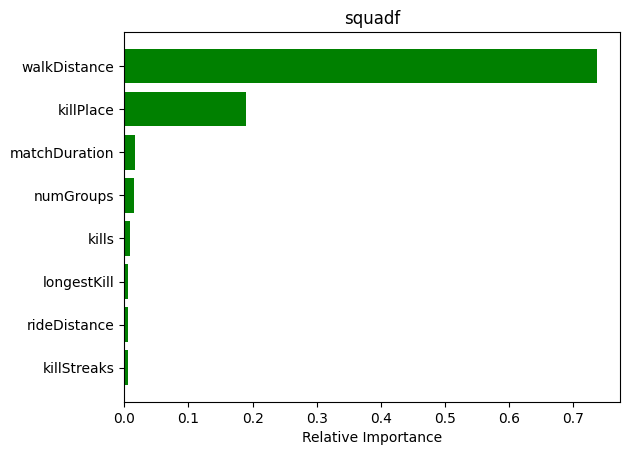

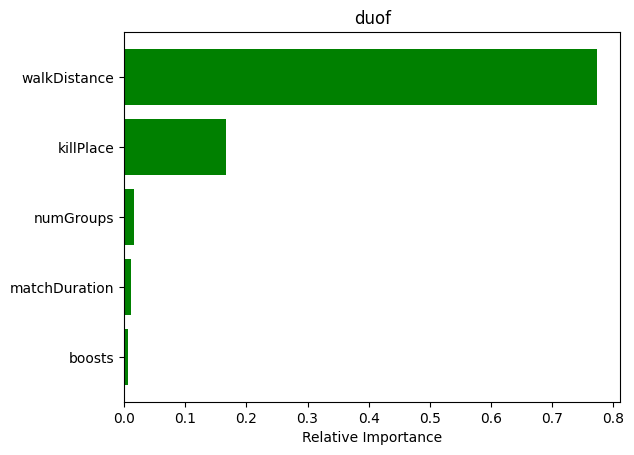

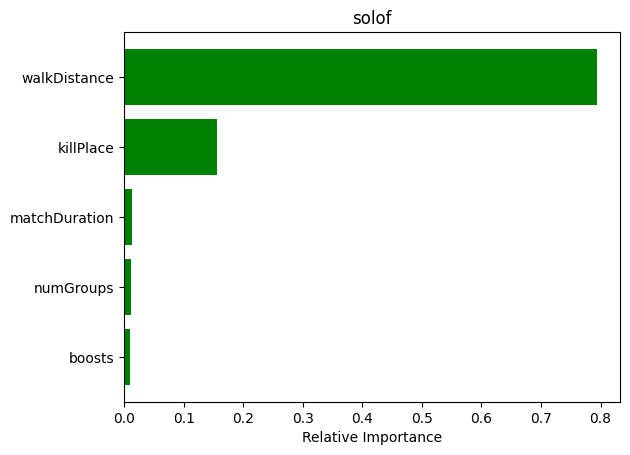

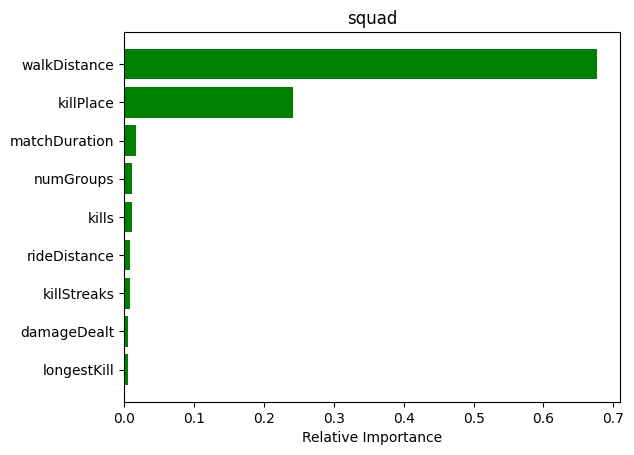

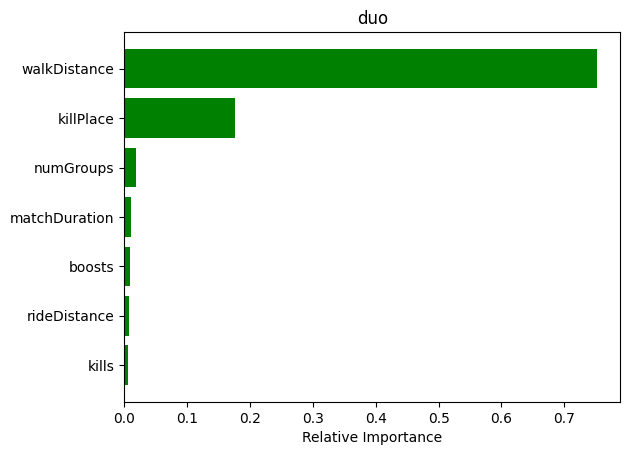

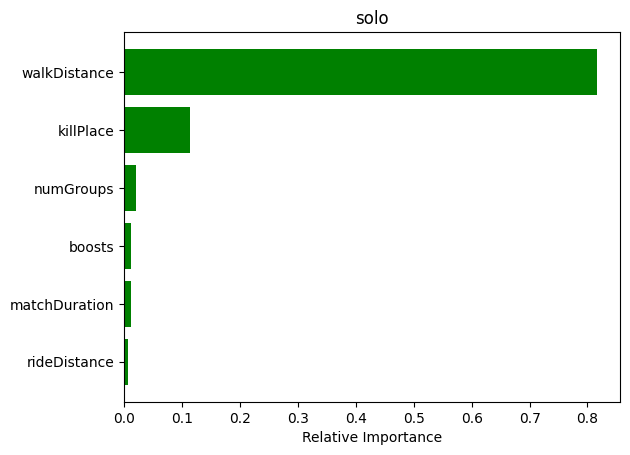

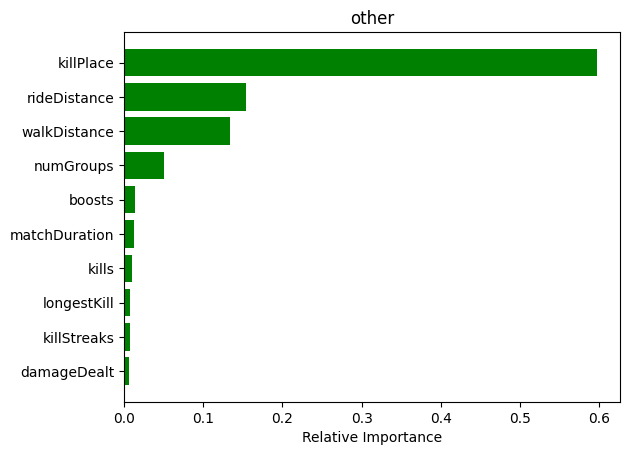

In [47]:
threshold = 0.005 
for j in range(0, 7):
    valid_indices = np.where(importance[j] >= threshold)[0]
    sorted_indices = np.argsort(importance[j][valid_indices])
    filtered_features = [features[i] for i in valid_indices]
    filtered_importance = importance[j][valid_indices]

    plt.title(data_name[j])
    plt.barh(range(len(sorted_indices)), filtered_importance[sorted_indices], color='g', align='center')
    plt.yticks(range(len(sorted_indices)), [filtered_features[i] for i in sorted_indices])
    plt.xlabel('Relative Importance')
    plt.show()